In [ ]:
%cd ..

import os
import urllib.request
from zipfile import ZipFile
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from src.model.neural_network import NeuralNetwork
from src.hyperparameter_tunning.grid_search import GridSearch
from src.utils.plots import plot_epochs_history
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=200)

In [13]:
X = np.arange(0, 10, 0.1)

y = np.sin(X)

X = X.reshape(X.shape[0], 1)
y = y.reshape(y.shape[0], 1)

# shuffle the training dataset
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
start_params = dict(input_shape = X_train.shape[1], output_n_neurons = y_train.shape[1], output_activation='linear', accuracy= 'regression_mae')

parameters = dict(loss = ['mean_squared_error'], optimizer = ['adam'], 
        epochs = [2000], batch_size = [None],        
        n_layers = [2, 3, 5], n_neurons = [50, 100],  
        learning_rate = [0.001, 0.01, 0.1])

In [16]:
grid_search = GridSearch((X_train, y_train), NeuralNetwork,
        start_params, parameters, validation_data = (X_val, y_val))

In [ ]:
grid_search.search()

In [18]:
grid_search.results_df

,input_shape,output_n_neurons,output_activation,loss,optimizer,epochs,batch_size,n_layers,n_neurons,learning_rate,...,momentum,add_dropout,dropout_rate,weights_l1_regularizer,weights_l2_regularizer,biases_l1_regularizer,biases_l2_regularizer,loss_value,accuracy,runtime
0,1,1,linear,mean_squared_error,adam,2000,None,2,50,0.001,...,0.4,0,0.3,0,0,0,0,0.000339,-0.015248,2.407562
1,1,1,linear,mean_squared_error,adam,2000,None,2,100,0.001,...,0.4,0,0.3,0,0,0,0,0.000109,-0.010569,3.707086
2,1,1,linear,mean_squared_error,adam,2000,None,5,50,0.100,...,0.4,0,0.3,0,0,0,0,0.412483,-0.816549,3.888602
3,1,1,linear,mean_squared_error,adam,2000,None,3,100,0.100,...,0.4,0,0.3,0,0,0,0,0.412481,-0.816544,5.639920
4,1,1,linear,mean_squared_error,adam,2000,None,3,50,0.100,...,0.4,0,0.3,0,0,0,0,0.412480,-0.816538,2.973049
5,1,1,linear,mean_squared_error,adam,2000,None,2,100,0.100,...,0.4,0,0.3,0,0,0,0,0.412481,-0.816544,4.340394
6,1,1,linear,mean_squared_error,adam,2000,None,2,50,0.100,...,0.4,0,0.3,0,0,0,0,0.412481,-0.816544,2.487349
7,1,1,linear,mean_squared_error,adam,2000,None,5,100,0.010,...,0.4,0,0.3,0,0,0,0,0.412481,-0.816544,7.534640
8,1,1,linear,mean_squared_error,adam,2000,None,5,50,0.010,...,0.4,0,0.3,0,0,0,0,0.412481,-0.816544,3.462749
9,1,1,linear,mean_squared_error,adam,2000,None,3,100,0.010,...,0.4,0,0.3,0,0,0,0,0.011070,-0.078581,5.446443


In [19]:
best_params = grid_search.get_best_params()
best_params

{'loss': 'mean_squared_error',
 'optimizer': 'adam',
 'epochs': 2000,
 'batch_size': None,
 'n_layers': 5,
 'n_neurons': 100,
 'learning_rate': 0.001}

In [ ]:
model = NeuralNetwork(**start_params)

model.set_params(**best_params)

model.fit(X, y, print_every_n_steps=100)

In [21]:
model.evaluate(X, y)

0-> Acc: -0.003 Loss: 0.000


(1.1333238844925085e-05, -0.0030830015207212757)

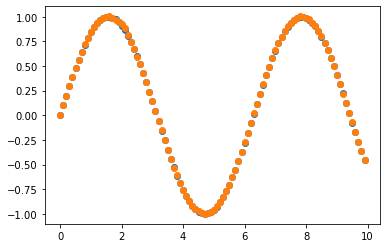

In [22]:
pred = model.predict(X)

plt.scatter(X, y)
plt.scatter(X, pred)
plt.show()